In [ ]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.metrics import classification_report

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # deluxe visualization library
import matplotlib.pyplot as plt # visualization library to support seaborn
%matplotlib inline

# importing dataset from persistent landing
thyroidDF = pd.read_csv('/content/thyroidDF.csv') # thyroidDF.csv
thyroidDF


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

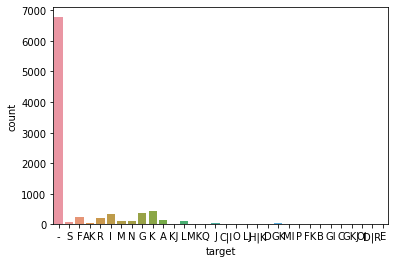

In [ ]:
sns.countplot('target',data=thyroidDF)

In [ ]:
# dropping redundant attributes from thyroidDF dataset
thyroidDF.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'patient_id', 'referral_source'], axis=1, inplace=True)

# re-mapping target vaues to diagnostic groups
diagnoses = {'-': 'negative',
             'A': 'hyperthyroid',
             'B': 'hyperthyroid',
             'C': 'hyperthyroid',
             'D': 'hyperthyroid',
             'E': 'hypothyroid',
             'F': 'hypothyroid',
             'G': 'hypothyroid',
             'H': 'hypothyroid'}

thyroidDF['target'] = thyroidDF['target'].map(diagnoses) # re-mapping
# dropping observations with 'target' null after re-mapping
thyroidDF.dropna(subset=['target'], inplace=True)

# dataset initial summary
thyroidDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7546 entries, 0 to 9171
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7546 non-null   int64  
 1   sex                  7296 non-null   object 
 2   on_thyroxine         7546 non-null   object 
 3   query_on_thyroxine   7546 non-null   object 
 4   on_antithyroid_meds  7546 non-null   object 
 5   sick                 7546 non-null   object 
 6   pregnant             7546 non-null   object 
 7   thyroid_surgery      7546 non-null   object 
 8   I131_treatment       7546 non-null   object 
 9   query_hypothyroid    7546 non-null   object 
 10  query_hyperthyroid   7546 non-null   object 
 11  lithium              7546 non-null   object 
 12  goitre               7546 non-null   object 
 13  tumor                7546 non-null   object 
 14  hypopituitary        7546 non-null   object 
 15  psych                7546 non-null   o

In [ ]:
thyroidDF.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,7546.000000,6824.000000,5337.000000,7192.000000,6870.000000,6877.000000,259.000000
mean,78.013782,5.421753,2.020935,105.203373,0.967322,110.571745,22.955019
std,1305.258137,26.080471,0.809865,32.606462,0.162315,36.600867,6.088392
min,1.000000,0.005000,0.050000,2.000000,0.190000,1.400000,0.100000
25%,37.000000,0.570000,1.600000,87.000000,0.870000,93.000000,20.000000
50%,55.000000,1.400000,2.000000,103.000000,0.960000,108.000000,23.000000
75%,67.000000,2.700000,2.300000,121.000000,1.060000,125.000000,27.000000
max,65526.000000,530.000000,18.000000,430.000000,2.120000,839.000000,45.000000


In [ ]:
thyroidDF[thyroidDF.age > 100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
2976,455,F,f,f,f,f,f,f,f,f,...,f,f,f,1.10,2.0,118.0,1.13,104.0,NaN,negative
5710,65511,M,f,f,f,f,f,f,f,f,...,f,f,f,0.38,2.0,113.0,1.08,104.0,NaN,negative
6392,65512,M,f,f,f,f,f,f,f,f,...,f,f,f,0.03,2.8,112.0,0.84,133.0,NaN,negative
8105,65526,F,f,f,f,f,f,f,f,f,...,f,f,f,1.50,NaN,132.0,1.02,129.0,NaN,negative


In [ ]:
thyroidDF['age'] = np.where((thyroidDF.age > 100), np.nan, thyroidDF.age)

In [ ]:
# TSH
Q1_TSH = thyroidDF['TSH'].quantile(0.25)
Q3_TSH = thyroidDF['TSH'].quantile(0.75)
IQR_TSH = Q3_TSH - Q1_TSH
under_TSH = thyroidDF['TSH'] < (Q1_TSH - 3 * IQR_TSH)
upper_TSH = thyroidDF['TSH'] > (Q3_TSH + 3 * IQR_TSH)
print('TSH:', 'lower outliers -', sum(under_TSH), ' | upper outliers -', sum(upper_TSH))

# T3
Q1_T3 = thyroidDF['T3'].quantile(0.25)
Q3_T3 = thyroidDF['T3'].quantile(0.75)
IQR_T3 = Q3_T3 - Q1_T3
under_T3 = thyroidDF['T3'] < (Q1_T3 - 3 * IQR_T3)
upper_T3 = thyroidDF['T3'] > (Q3_T3 + 3 * IQR_T3)
print('T3:', 'lower outliers -', sum(under_T3), ' | upper outliers -', sum(upper_T3))

# TT4
Q1_TT4 = thyroidDF['TT4'].quantile(0.25)
Q3_TT4 = thyroidDF['TT4'].quantile(0.75)
IQR_TT4 = Q3_TT4 - Q1_TT4
under_TT4 = thyroidDF['TT4'] < (Q1_TT4 - 3 * IQR_TT4)
upper_TT4 = thyroidDF['TT4'] > (Q3_TT4 + 3 * IQR_TT4)
print('TT4:', 'lower outliers -', sum(under_TT4), ' | upper outliers -', sum(upper_TT4))

# T4U
Q1_T4U = thyroidDF['T4U'].quantile(0.25)
Q3_T4U = thyroidDF['T4U'].quantile(0.75)
IQR_T4U = Q3_T4U - Q1_T4U
under_T4U = thyroidDF['T4U'] < (Q1_T4U - 3 * IQR_T4U)
upper_T4U = thyroidDF['T4U'] > (Q3_T4U + 3 * IQR_T4U)
print('T4U:', 'lower outliers -', sum(under_T4U), ' | upper outliers -', sum(upper_T4U))

# FTI
Q1_FTI = thyroidDF['FTI'].quantile(0.25)
Q3_FTI = thyroidDF['FTI'].quantile(0.75)
IQR_FTI = Q3_FTI - Q1_FTI
under_FTI = thyroidDF['FTI'] < (Q1_FTI - 3 * IQR_FTI)
upper_FTI = thyroidDF['FTI'] > (Q3_FTI + 3 * IQR_FTI)
print('FTI:', 'lower outliers -', sum(under_FTI), ' | upper outliers -', sum(upper_FTI))

TSH: lower outliers - 0  | upper outliers - 456
T3: lower outliers - 0  | upper outliers - 84
TT4: lower outliers - 0  | upper outliers - 55
T4U: lower outliers - 7  | upper outliers - 22
FTI: lower outliers - 0  | upper outliers - 83


In [ ]:
# calculating missingess of entire DF
missingness = thyroidDF.isnull().sum().sum() / thyroidDF.count().sum()
print('Overall Missingness of thyroidDF is: {:.2f}%'.format(missingness * 100))

# Create table for missing data analysis
def missing_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

# Analyze missing data
missing_table(thyroidDF).head(10)

Overall Missingness of thyroidDF is: 7.54%


,Total,Percent
TBG,7287,0.965677
T3,2209,0.292738
TSH,722,0.095680
T4U,676,0.089584
FTI,669,0.088656
TT4,354,0.046912
sex,250,0.033130
age,4,0.000530
goitre,0,0.000000
psych,0,0.000000


In [ ]:
# dropping 'TBG' attribute from dataset
thyroidDF.drop(['TBG'], axis=1, inplace=True)

# dropping 4 observations with abnormal 'age' from dataset
thyroidDF.dropna(subset=['age'], inplace=True)

# changing sex of observations with ('pregnant' == True) & ('sex' == null) to Female
thyroidDF['sex'] = np.where((thyroidDF.sex.isnull()) & (thyroidDF.pregnant == 't'), 'F', thyroidDF.sex)

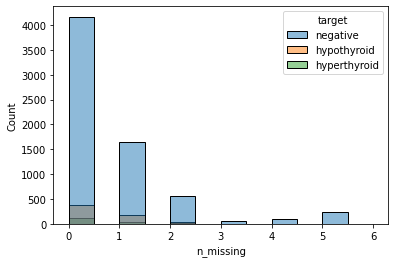

In [ ]:
# count missing values per row
thyroidDF['n_missing'] = thyroidDF.isnull().sum(axis=1)
sns.histplot(thyroidDF, x='n_missing', binwidth=0.5, hue='target');

In [ ]:
# calculating missingess of entire DF
missingness = thyroidDF.isnull().sum().sum() / thyroidDF.count().sum()
print('Overall Missingness of thyroidDF is: {:.2f}%'.format(missingness * 100))

# remove rows with 3 or more missing values
thyroidDF.drop(thyroidDF.index[thyroidDF['n_missing'] > 2], inplace=True)
print
missing_table(thyroidDF).head(10)

Overall Missingness of thyroidDF is: 2.89%


,Total,Percent
T3,1910,0.267432
TSH,406,0.056847
T4U,290,0.040605
FTI,283,0.039625
sex,208,0.029123
TT4,6,0.000840
age,0,0.000000
goitre,0,0.000000
target,0,0.000000
psych,0,0.000000


In [ ]:
thyroidDF

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target,n_missing
1,29.0,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128.0,NaN,NaN,negative,2
7,28.0,F,f,f,f,f,f,f,f,f,...,f,f,f,0.7,2.6,116.0,NaN,NaN,negative,2
8,28.0,F,f,f,f,f,f,f,f,f,...,f,f,f,1.2,1.8,76.0,NaN,NaN,negative,2
9,28.0,F,f,f,f,f,f,f,f,f,...,f,f,f,1.9,1.7,83.0,NaN,NaN,negative,2
10,54.0,F,f,f,f,f,f,f,f,f,...,f,f,f,1.9,2.3,133.0,NaN,NaN,negative,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,70.0,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,88.0,0.74,119.0,negative,2
9167,56.0,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,64.0,0.83,77.0,negative,2
9168,22.0,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,91.0,0.92,99.0,negative,2
9170,47.0,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,75.0,0.85,88.0,negative,2


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

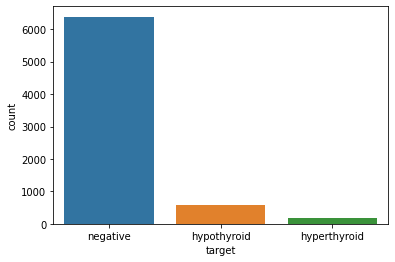

In [ ]:
sns.countplot('target',data=thyroidDF)

In [ ]:
thyroidDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7142 entries, 1 to 9171
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7142 non-null   float64
 1   sex                  6934 non-null   object 
 2   on_thyroxine         7142 non-null   object 
 3   query_on_thyroxine   7142 non-null   object 
 4   on_antithyroid_meds  7142 non-null   object 
 5   sick                 7142 non-null   object 
 6   pregnant             7142 non-null   object 
 7   thyroid_surgery      7142 non-null   object 
 8   I131_treatment       7142 non-null   object 
 9   query_hypothyroid    7142 non-null   object 
 10  query_hyperthyroid   7142 non-null   object 
 11  lithium              7142 non-null   object 
 12  goitre               7142 non-null   object 
 13  tumor                7142 non-null   object 
 14  hypopituitary        7142 non-null   object 
 15  psych                7142 non-null   o

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_sample_weight

# replacing boolean strings with binary 0 and 1
thyroidDF.replace('f', 0, inplace=True)
thyroidDF.replace('t', 1, inplace=True)

# replacing sex with binary 0 and 1
thyroidDF.replace('M', 0, inplace=True) # male mapped to 0
thyroidDF.replace('F', 1, inplace=True) # female mapped to 1

a = thyroidDF.replace(np.nan, 0)

# re-mapping target vaues to diagnostic groups
# *** I get different final results by ordering these classes differently ***
diagnoses = {'negative': 0,
             'hypothyroid': 1,
             'hyperthyroid': 2}
a['target'] = a['target'].map(diagnoses) # re-mapping

# train and test split --> stratified
X = a.drop('target', axis=1).copy()
y = a['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [ ]:
# Models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

models = dict()
models['Decision Tree'] = DecisionTreeClassifier()
models['Logreg'] = LogisticRegression()
models['Random Forest'] = RandomForestClassifier()
models['Support Vector Machine'] = SVC(kernel = 'sigmoid', gamma='scale')
models['kNN'] = KNeighborsClassifier()
models['Naive Bayes'] = GaussianNB()
models['KMeans'] = KMeans(n_clusters=2, n_init=10, random_state=42)
for model in models:

    models[model].fit(X_train, y_train)
    print(model + " model fitting completed.")

Decision Tree model fitting completed.
Logreg model fitting completed.


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest model fitting completed.
Support Vector Machine model fitting completed.
kNN model fitting completed.
Naive Bayes model fitting completed.
KMeans model fitting completed.


Test Set Prediction:

--------------------Decision Tree--------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1597
           1       0.98      0.99      0.99       145
           2       0.80      0.84      0.82        44

    accuracy                           0.99      1786
   macro avg       0.93      0.94      0.93      1786
weighted avg       0.99      0.99      0.99      1786



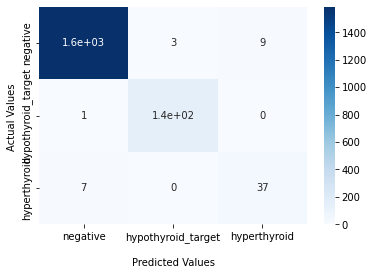

--------------------Logreg--------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1597
           1       0.93      0.79      0.86       145
           2       0.89      0.39      0.54        44

    accuracy                           0.96      1786
   macro avg       0.93      0.72      0.79      1786
weighted avg       0.96      0.96      0.96      1786



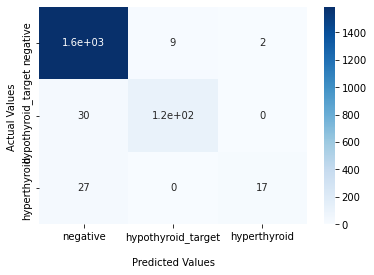

--------------------Random Forest--------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1597
           1       0.97      1.00      0.98       145
           2       0.89      0.75      0.81        44

    accuracy                           0.99      1786
   macro avg       0.95      0.91      0.93      1786
weighted avg       0.99      0.99      0.99      1786



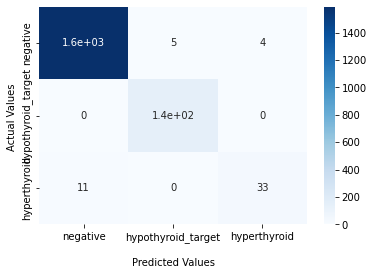

--------------------Support Vector Machine--------------------


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1597
           1       0.22      0.23      0.23       145
           2       0.00      0.00      0.00        44

    accuracy                           0.87      1786
   macro avg       0.38      0.39      0.39      1786
weighted avg       0.85      0.87      0.86      1786



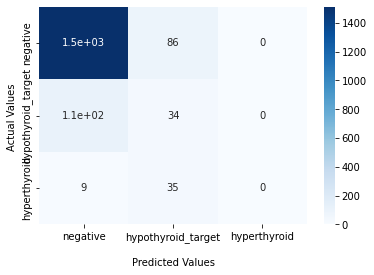

--------------------kNN--------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1597
           1       0.94      0.59      0.72       145
           2       0.83      0.68      0.75        44

    accuracy                           0.95      1786
   macro avg       0.91      0.75      0.82      1786
weighted avg       0.95      0.95      0.95      1786



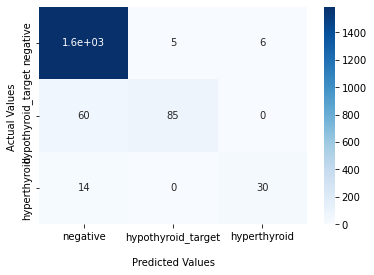

--------------------Naive Bayes--------------------
              precision    recall  f1-score   support

           0       0.98      0.20      0.33      1597
           1       0.64      0.74      0.68       145
           2       0.03      0.98      0.06        44

    accuracy                           0.26      1786
   macro avg       0.55      0.64      0.36      1786
weighted avg       0.93      0.26      0.35      1786



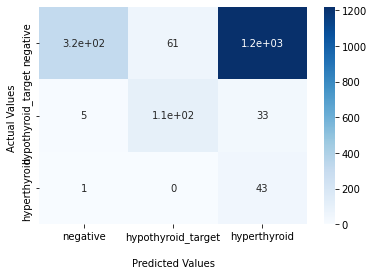

--------------------KMeans--------------------
              precision    recall  f1-score   support

           0       0.85      0.45      0.59      1597
           1       0.02      0.14      0.04       145
           2       0.00      0.00      0.00        44

    accuracy                           0.42      1786
   macro avg       0.29      0.20      0.21      1786
weighted avg       0.76      0.42      0.53      1786



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


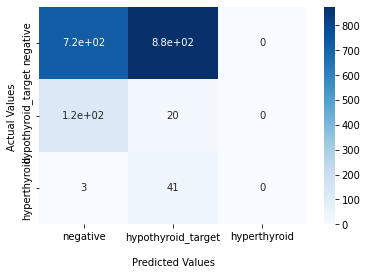

In [ ]:
print("Test Set Prediction:\n")

for x in models:

    print('-'*20+x+'-'*20)
    y_pred = models[x].predict(X_test)
    arg_test = {'y_true':y_test, 'y_pred':y_pred}
    print(classification_report(**arg_test))
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['negative','hypothyroid_target','hyperthyroid'])
    ax.yaxis.set_ticklabels(['negative','hypothyroid_target','hyperthyroid'])
    plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ACCURACY OF THE MODEL:  0.9748040313549832


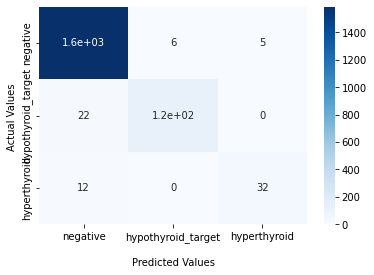

In [ ]:
LogisticRegression(class_weight='balanced')
logistic_regression = LogisticRegression(max_iter=1000);
random_forest = RandomForestClassifier(n_estimators = 200);
knn           = KNeighborsClassifier(n_neighbors=3);
model = VotingClassifier (estimators=[('lr',logistic_regression), ('rf', random_forest), ('knn',knn)], voting='soft')
model.fit(X_train, y_train);
y_pred = model.predict(X_test);
from sklearn import metrics
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred));
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['negative','hypothyroid_target','hyperthyroid'])
ax.yaxis.set_ticklabels(['negative','hypothyroid_target','hyperthyroid'])
plt.show()


SVM: 0.945112 (0.007951)
RFC: 0.987492 (0.002893)
CART: 0.983570 (0.004402)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LR: 0.957992 (0.005604)
KNN: 0.954258 (0.008018)
NB: 0.259145 (0.019622)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

kMeans: 0.236535 (0.055013)


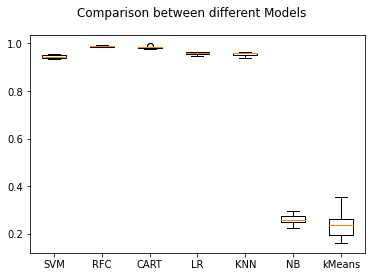

In [ ]:
from sklearn.svm import SVC
svm=SVC()
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

models = []
# models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
# models.append(('LR', LogisticRegression()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('kMeans', KMeans()))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=None)
  cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different Models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

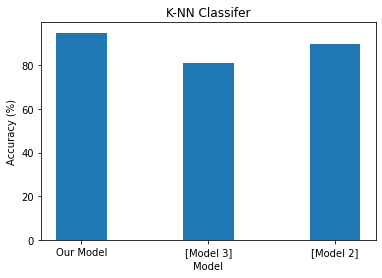

In [ ]:
import matplotlib.pyplot as plt

# Set the data
accuracies = [95, 81,90]
models = ['Our Model', '[Model 3]','[Model 2]']

# Create the bar graph
plt.bar(models, accuracies, width=0.4)

# Add a title and axis labels
plt.title('K-NN Classifer')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')

# Show the graph
plt.show()

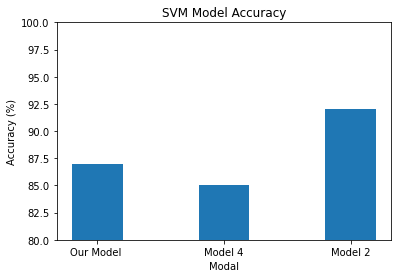

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set data for accuracy
accuracy = [87, 85, 92]

# Set x-axis labels for modals
modal_labels = ['Our Model ', 'Model 4', 'Model 2']

# Set y-axis limits
plt.ylim(80, 100)

# Create the bar chart
plt.bar(modal_labels, accuracy, width=0.4)

# Add a title and axis labels
plt.title('SVM Model Accuracy')
plt.xlabel('Modal')
plt.ylabel('Accuracy (%)')

# Display the chart
plt.show()


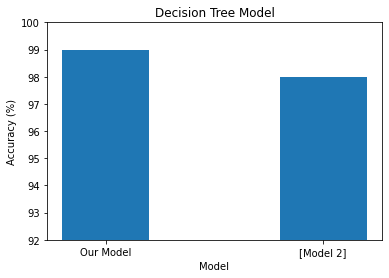

In [ ]:
import matplotlib.pyplot as plt

# Set the data
accuracies = [99, 98]
models = ['Our Model', '[Model 2]']

# Create the bar graph
plt.bar(models, accuracies, width=0.4)

# Set y-axis limits
plt.ylim(92, 100)

# Add a title and axis labels
plt.title('Decision Tree Model')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')

# Show the graph
plt.show()

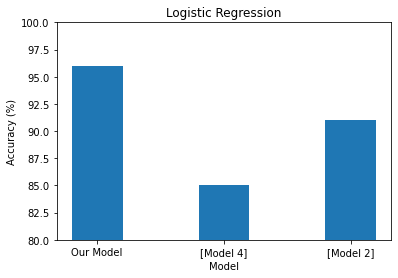

In [ ]:
import matplotlib.pyplot as plt

# Set the data
accuracies = [96, 85,91]
models = ['Our Model', '[Model 4]','[Model 2]']

# Create the bar graph
plt.bar(models, accuracies, width=0.4)

# Set y-axis limits
plt.ylim(80, 100)

# Add a title and axis labels
plt.title('Logistic Regression')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')

# Show the graph
plt.show()

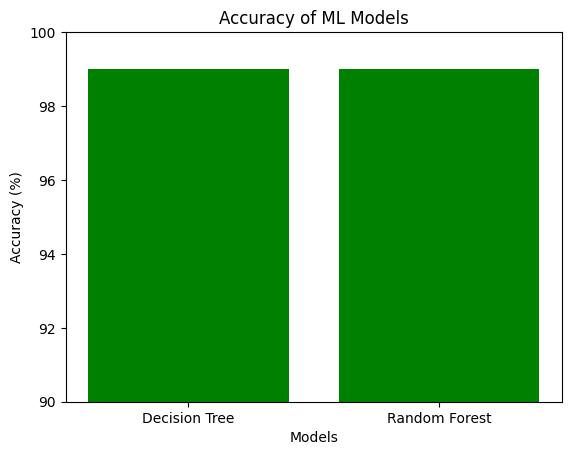

In [ ]:
import matplotlib.pyplot as plt

# define the models and their corresponding accuracy values
models = ['Decision Tree', 'Random Forest']
accuracy = [99, 99]

# set the x-axis labels and positions
x_pos = [i for i, _ in enumerate(models)]

# create the bar chart
plt.bar(x_pos, accuracy, color='green')

# set the y-axis limit to 99
plt.ylim([90, 100])

# set the chart title and labels
plt.title('Accuracy of ML Models')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')

# set the x-axis tick labels to the model names
plt.xticks(x_pos, models)

# show the chart
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# read the dataset
data = pd.read_csv('/content/thyroidDF (1).csv')
features = data.drop('target', axis=1)
labels = data['target']

# define the train-test splits
splits = [(0.7, 0.3), (0.8, 0.2), (0.6, 0.4)]

for train_size, test_size in splits:
    # split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=train_size, test_size=test_size, random_state=42)

    # train a decision tree classifier on the train set
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # predict the labels on the test set
    pred_labels = clf.predict(X_test)

    # compute the confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, pred_labels).ravel()

    # compute the performance metrics
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    fpr = fp / (fp + tn)
    npv = tn / (tn + fn)
    fdr = fp / (fp + tp)
    f1_score = 2 * precision * sensitivity / (precision + sensitivity)
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

    # print the results
    print('Train-Test Split: {}-{}'.format(train_size, test_size))
    print('Specificity:', specificity)
    print('Sensitivity:', sensitivity)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('FPR:', fpr)
    print('NPV:', npv)
    print('FDR:', fdr)
    print('F1-Score:', f1_score)
    print('MCC:', mcc)
    print('------------------------')


ValueError: ignored

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# read the dataset
data = pd.read_csv('/content/thyroidDF (1).csv')

# separate features and labels
features = data.drop('target', axis=1)
labels = data['target']

# encode categorical features using OneHotEncoder
encoder = OneHotEncoder()
features_encoded = encoder.fit_transform(features)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, labels, test_size=0.3, random_state=42)

# train a decision tree classifier on the encoded train set
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# predict the labels on the encoded test set
y_pred = clf.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8241279069767442


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

def sensitivity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn)

def accuracy(y_true, y_pred):
    return (y_true == y_pred).mean()

def precision(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fp)

def fpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp / (fp + tn)

def npv(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fn)

def fdr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp / (fp + tp)

def f1_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return 2 * (precision * recall) / (precision + recall)

def mcc(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    numerator = (tp * tn) - (fp * fn)
    denominator = ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    return numerator / denominator

# read the dataset
data = pd.read_csv('/content/thyroidDF (1).csv')

# separate features and labels
features = data.drop('target', axis=1)
labels = data['target']

# perform train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# train a decision tree classifier on the train set
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# predict the labels on the test set
y_pred = clf.predict(X_test)

# calculate the evaluation metrics
print('Specificity:', specificity(y_test, y_pred))
print('Sensitivity:', sensitivity(y_test, y_pred))
print('Accuracy:', accuracy(y_test, y_pred))
print('Precision:', precision(y_test, y_pred))
print('FPR:', fpr(y_test, y_pred))
print('NPV:', npv(y_test, y_pred))
print('FDR:', fdr(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))
print('MCC:', mcc(y_test, y_pred))

ValueError: ignored